# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activations, optimizers)
### LECTURE: CodeChallenge: Adam with L2 regularization
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [63]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from IPython.display import display, clear_output


# Create the data

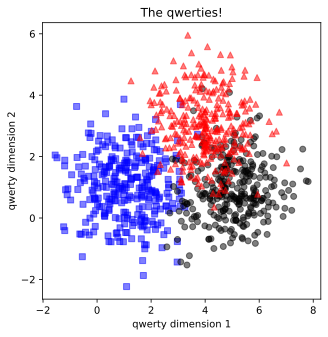

In [64]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [65]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# The model

In [66]:
# create a class for the model
def createTheQwertyNet(L2lambda):

  class qwertyNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(2,8)
      
      ### hidden layer
      self.fc1 = nn.Linear(8,8)

      ### output layer
      self.output = nn.Linear(8,3)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      return self.output(x)
  
  # create the model instance
  net = qwertyNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001,weight_decay=L2lambda)

  return net,lossfun,optimizer


# A function that trains the model

In [67]:
def function2trainTheModel(L2lambda, numepochs):
  # create a new model
  net,lossfun,optimizer = createTheQwertyNet(L2lambda)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    net.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) ) 
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


# We now test the functions

In [68]:
# We test everything
L2lambda = 0.5
trainAcc,testAcc,losses,net = function2trainTheModel(L2lambda, 50)
print(trainAcc)

[np.float32(33.25), np.float32(33.25), np.float32(33.5), np.float32(33.5), np.float32(33.25), np.float32(33.375), np.float32(33.625), np.float32(33.375), np.float32(33.125), np.float32(33.375), np.float32(33.5), np.float32(33.375), np.float32(33.125), np.float32(33.625), np.float32(33.25), np.float32(33.25), np.float32(33.125), np.float32(33.5), np.float32(33.25), np.float32(33.125), np.float32(33.375), np.float32(33.125), np.float32(33.25), np.float32(33.125), np.float32(33.5), np.float32(33.5), np.float32(33.25), np.float32(33.25), np.float32(33.25), np.float32(33.375), np.float32(33.75), np.float32(33.25), np.float32(33.75), np.float32(33.625), np.float32(33.375), np.float32(33.25), np.float32(32.0), np.float32(32.5), np.float32(33.25), np.float32(33.5), np.float32(29.5), np.float32(31.25), np.float32(30.5), np.float32(34.25), np.float32(33.75), np.float32(33.5), np.float32(33.25), np.float32(32.125), np.float32(33.125), np.float32(32.0)]


# Proper experiment where we test the best L2 regularization with Adam optimizer

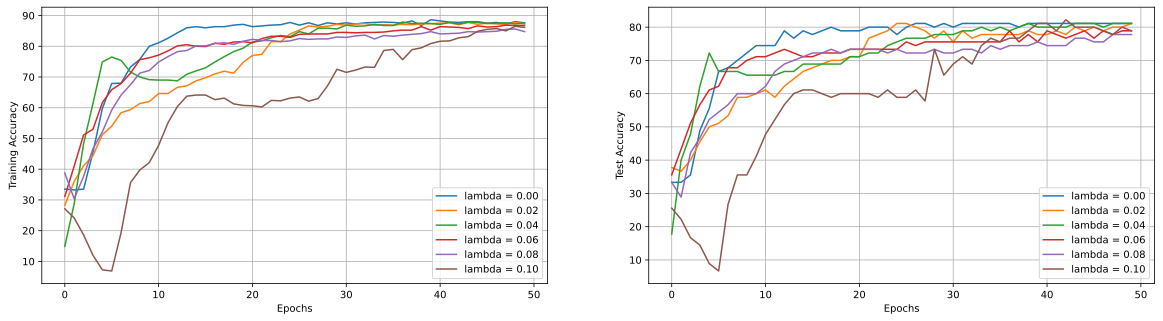

<Figure size 2000x500 with 0 Axes>

In [69]:
# set parameters
L2lambdas = np.linspace(0,.1,6)
numepochs = 50

# set variables that will store information
trainAccs = np.zeros((len(L2lambdas), numepochs))
testAccs = np.zeros((len(L2lambdas), numepochs))
linesTrain = {}
linesTest = {}
    
# initialize the plot
plt.ion()  # turn on interactive mode
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# create lines for the plot
for i, l2lambda in enumerate(L2lambdas):
    linesTrain[i] = ax[0].plot(np.arange(numepochs), trainAccs[i], label='lambda = {:.2f}'.format(l2lambda))
    linesTest[i] = ax[1].plot(np.arange(numepochs), testAccs[i], label='lambda = {:.2f}'.format(l2lambda))

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training Accuracy')
ax[0].legend()

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Test Accuracy')
ax[1].legend()

ax[0].grid()
ax[1].grid()

for i in range(len(L2lambdas)):
    trainAcc,testAcc,losses,net = function2trainTheModel(l2lambda, numepochs)
    lineTrain = linesTrain[i][0]
    lineTest = linesTest[i][0]

    lineTrain.set_ydata(trainAcc)
    lineTest.set_ydata(testAcc)
        
    #update the plot
    ax[0].relim()
    ax[1].relim()
    ax[0].autoscale_view()
    ax[1].autoscale_view()
    clear_output(wait=True)
    display(fig)
    fig.canvas.draw()
    fig.canvas.flush_events()

fig.clear()
plt.ioff()
plt.show()